In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [56]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.3 in c:\users\ts\anaconda3\lib\site-packages (from matplotlib->wordcloud) (2.4.7)



In [58]:
!pip install tweet-preprocessor


In [2]:
import preprocessor as p

In [3]:
# import the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test_with_no_labels.csv')
#train = train.drop('sentiment', axis = 1)

### Variables definitions

Sentiment: Sentiment of tweet

Message: Tweet body

Tweetid: Twitter unique id

 ### Sentiment Discription
  
        Class   Sentiments    Description
         2	   News:         the tweet link to factual news about climate change
         1       Pro:          the tweet supports the belief of man-made climate change
         0	   Neutral:      the tweet neither supports nor refutes the belief of man-made climate change
        -1       Anti:         the tweet does not believe in man-made climate change

<iframe src="https://www.kaggle.com/embed/tsheposibanyoni/climate-change-sentiment-analysis-notebook?cellIds=12&kernelSessionId=37716841" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Climate Change Sentiment Analysis Notebook"></iframe>

In [4]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [5]:
train.shape

(15819, 3)

In [6]:
train.isna().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [7]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [8]:
test.shape

(10546, 2)

In [9]:
test.isna().sum()

message    0
tweetid    0
dtype: int64

In [10]:
# converting to binary
# df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

In [11]:
train.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [12]:
blanks = []  

for ms in train.itertuples():  
    if type(ms)==str:            
        if ms.isspace():         
            blanks.append(i)     
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


In [13]:
blanks = []  

for ms in test.itertuples():  
    if type(ms)==str:            
        if ms.isspace():         
            blanks.append(i)     
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


**Observation:**
* The training dataset has no null values or any blank tweet rows within it.
* The test data also has no missing values or blank tweet rows

In [19]:
from matplotlib.pyplot import suptitle

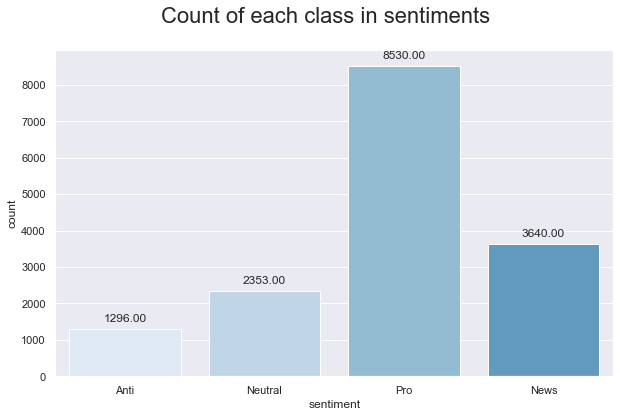

In [21]:
# Counting No. of elements in each classes in sentiment

f, ax = plt.subplots(figsize=(10,6))
labels = ['Anti','Neutral','Pro','News']
suptitle("Count of each class in sentiments",fontsize=22)
sns.set(style="darkgrid",palette='Blues')

count = sns.countplot(x='sentiment', data=train)
ax.set(xticks=range(4), xticklabels=labels)

for p in count.patches:
    ax.annotate(format(p.get_height(),'.2f'),
                   (p.get_x()+p.get_width() / 2.,p.get_height()),
                   ha='center',va='center',xytext=(0, 10),
                   textcoords='offset points')

In [22]:
'''
We creating a Collection of written text of each sentiment class '''

news_tweets = ' '.join([text for text in train['message']
                        [train['sentiment'] == 2]])
pro_tweets = ' '.join([text for text in train['message']
                       [train['sentiment'] == 1]])
neutral_tweets = ' '.join([text for text in train['message']
                           [train['sentiment'] == 0]])
anti_tweets = ' '.join([text for text in train['message']
                        [train['sentiment'] == -1]])

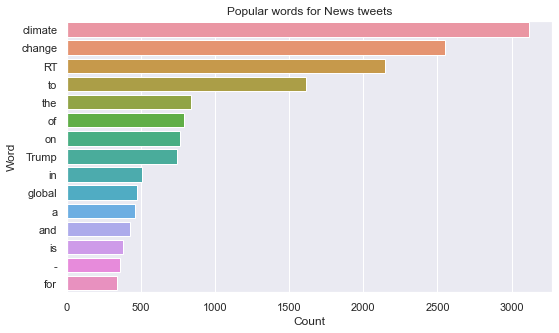

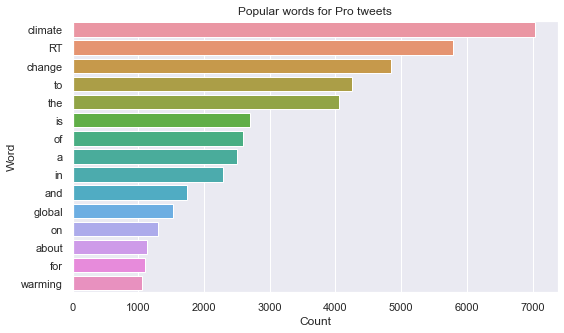

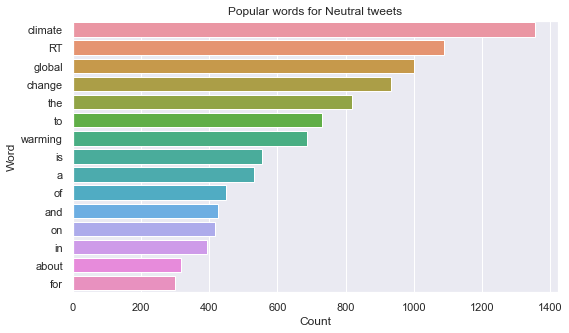

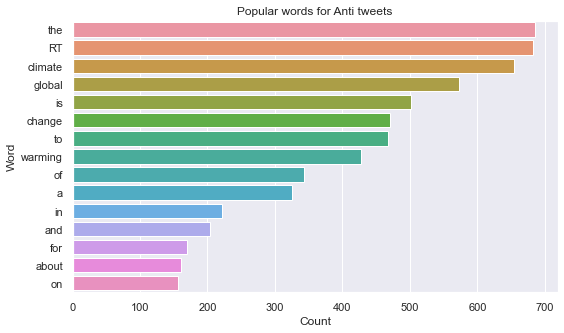

In [81]:
# Visualising sentiment class 
full_title = ['Popular words for News tweets',
              'Popular words for Pro tweets',
              'Popular words for Neutral tweets',
              'Popular words for Anti tweets']
#creating a list for the visuals 
tweet_list = [news_tweets, pro_tweets,
              neutral_tweets, anti_tweets]

plt.rcParams['figure.figsize'] = [40, 5]

for i, sent in enumerate(tweet_list):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent.split(' '))
    df = pd.DataFrame({'Word': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Word', x='Count')
    plt.title(full_title[i])
    plt.show()

* The graphs above showcase the evidence of noise. A lot of stop words are picked up as being important which include: (the, to, and, also of). Also, in the graph labeled popular for news tweets, there is a punctuation (a dash -) picked up as an important word.

#### Wordcloud

Creating a word cloud to visualizate tweet keywords and text data.
This is to highlight popular or trending terms based on frequency of use and prominence.
The larger the word in the visual the more common the word is on tweet messages.

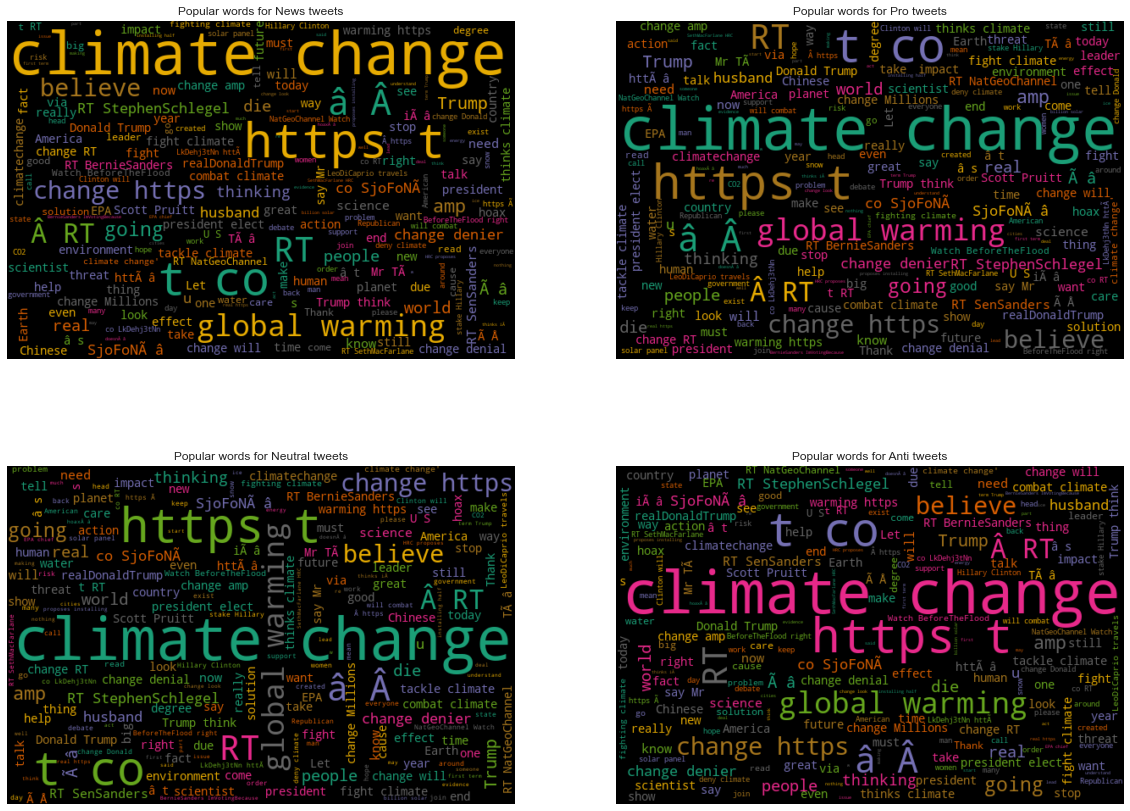

In [82]:
# Create word clouds of the most common words in each sentiment class
wc = WordCloud(width=600, height=400, 
               background_color='black', colormap='Dark2',
               max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots 
for i in range(0, len(tweet_list)):
    wc.generate(tweet_list[1])
    
    plt.subplot(2, 2, i + 1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(full_title[i])
    
plt.show()

**Observation:**
* The size of the word indicates the relevance in the tweet.
* The most popular words in all four classes are climate change, global warming and belief.
* The pro and anti groups include a number of words that might be expected in each group.
* In the word clouds there is evidence of noisy text which include words such as https, webside, co and RT. These do not assist us in our classification, rather they add noise, we will have another look at it when the noise have been removed.
* https occurs frequently in pro climate change tweets, implying that many links are being shared around the topic of climate change. These could be links to petitions, websites and/or articles related to climate change. Interesting to note: https only occurs in the top 25 words for the pro climate change class.



Apply tweet preprocessing first. Define a preprocess function and use pandas apply to apply it on each value of 'message'

In [102]:
def preprocess_tweet(row):
    message = row['message']
    message = p.clean(message)
    return message

In [103]:
train['message'] = train.apply(preprocess_tweet, axis=1)

In [104]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,: Researchers say we have three years to act o...,698562
3,1,WIRED : was a pivotal year in the war on clima...,573736
4,1,": It's , and a racist, sexist, climate change ...",466954


Now we can apply normal text preprocessing like:

Lowercasing, 
Punctuation Removal, 
Replace extra white spaces, 
Stopwords removal

### Remove punctuation

First we make all the text lower case to remove some noise from capitalisation.

In [113]:
train['message'] = train['message'].str.lower()

Now let's remove the punctuation using the `string` import.

In [119]:
import string
print(string.punctuation)

def remove_punctuation(message):
    return ''.join([l for l in message if l not in string.punctuation])

train['message'] = train['message'].apply(remove_punctuation)
train['message'].iloc[2689]

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


' shes thinking shes going die husband doesnt believe climate change'

### Tokenisation

A tokeniser divides text into a sequence of tokens, which roughly correspond to "words". We will use tokenisers to clean up the data, making it ready for analysis.

In [121]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

We will use the TreeBankWordTokenizer since it is MUCH quicker than the word_tokenize function.

In [122]:
tokeniser = TreebankWordTokenizer()
train['tokens'] = train['message'].apply(tokeniser.tokenize)

In [126]:
train['tokens'].iloc[5255]

['g20s', 'agenda', 'ignore', 'climate', 'change', 'business', 'leaders']

### Stemming

Stemming is the process of transforming to the root word. It uses an algorithm that removes
common word-endings from English words, such as “ly,” “es,” “ed,” and “s.” 

For example, assuming for an analysis you may want to consider “carefully,” “cared,” “cares,” “caringly” as “care” instead of separate words. There are three widely used stemming algorithms, namely:
* Porter
* Lancaster
* Snowball

Out of these three, we will be using the `SnowballStemmer`.

In [133]:
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer

In [128]:
# find the stem of each word in words
#stemmer = SnowballStemmer('english')
#for word in words.split():
#    print(stemmer.stem(word))

In [134]:
stemmer = SnowballStemmer('english')

Now let us stem all of the words in the MBTI dataframe.

In [135]:
def message_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

In [136]:
train['stem'] = train['tokens'].apply(message_stemmer, args=(stemmer, ))

Print off the results of the stemmer to see what we have done.

In [140]:
for i, t in enumerate(train.iloc[2687]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, train.iloc[2687]['stem'][i]))

as                   --> as        
i                    --> i         
say                  --> say       
i                    --> i         
dont                 --> dont      
know                 --> know      
truth                --> truth     
climate              --> climat    
change               --> chang     
i                    --> i         
wonder               --> wonder    
topic                --> topic     
conforms             --> conform   


### Lemmatization

A very similar operation to stemming is called lemmatization. Lemmatizing is the process of grouping words of similar meaning together. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma.

Sometimes you will wind up with a very similar word, but other times you will wind up with a completely different word. Let's see some examples.

In [145]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [146]:
lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))
print(lemmatizer.lemmatize("run"))
print(lemmatizer.lemmatize("ran",'v'))

Let's lemmatize all of the words in the Train dataframe.

In [147]:
def message_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]    

In [148]:
train['lemma'] = train['tokens'].apply(message_lemma, args=(lemmatizer, ))

Now we will print out the results of the lemmatization to see what we have done.

In [152]:
for i, t in enumerate(train.iloc[2687]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, train.iloc[2687]['lemma'][i]))

as                   --> a         
i                    --> i         
say                  --> say       
i                    --> i         
dont                 --> dont      
know                 --> know      
truth                --> truth     
climate              --> climate   
change               --> change    
i                    --> i         
wonder               --> wonder    
topic                --> topic     
conforms             --> conforms  


### Stop Words

Stop words are words which do not contain important significance to be used in Search Queries. Usually these words are filtered out from search queries because they return a vast amount of unnecessary information.

In [153]:
from nltk.corpus import stopwords

In [154]:
#def stopword_removal(row):
#   message = row['message']
#    message = remove_stopwords(message)
#   return message

In [155]:
 def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [157]:
train['stem'] = train['tokens'].apply(remove_stop_words)

In [158]:
train['message'] = train.apply(stopword_removal, axis=1)

In [159]:
train.head()

,sentiment,message,tweetid,tokens,stem,lemma
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,like lack evidence anthropogenic global warming,126103,"[its, like, lack, evidence, anthropogenic, glo...","[like, lack, evidence, anthropogenic, global, ...","[it, like, lack, evidence, anthropogenic, glob..."
2,2,researchers years act climate change late,698562,"[researchers, years, act, climate, change, late]","[researchers, years, act, climate, change, late]","[researcher, year, act, climate, change, late]"
3,1,wired pivotal year war climate change,573736,"[wired, pivotal, year, war, climate, change]","[wired, pivotal, year, war, climate, change]","[wired, pivotal, year, war, climate, change]"
4,1,racist sexist climate change denying bigot lea...,466954,"[its, racist, sexist, climate, change, denying...","[racist, sexist, climate, change, denying, big...","[it, racist, sexist, climate, change, denying,..."
